In [229]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import data

model_family_dir = Path('model/reddit')
fields = data.load_fields(model_family_dir)
comms = fields['community'].vocab.itos

token_ids = list(map(str, range(64)))
token_ids_ = token_ids + ['final']
lstm_dir = model_family_dir/'lstm_classifier_/lstm_classifier'
unig_dir = model_family_dir/'unigram-cond'
 
%matplotlib inline

model/reddit/text.field
Using existing fields.


In [230]:
lstm, unig = {}, {}
for res, model_dir in [(lstm, lstm_dir), (unig, unig_dir)]:
    for metric in ['entropy', 'cross_entropy', 'pred']:
        res[metric] = pd.read_csv(model_dir/f'{metric}.csv')
        res[metric]['final'] = res[metric].apply(lambda x: x[str(int(x.length)-1)], axis=1)
    correct_comms = pd.concat([res['pred'].community] * len(token_ids_), axis=1)
    correct_comms.columns = token_ids_
    res['correct_preds'] = res['pred'].copy()
    res['correct_preds'][token_ids_] = res['pred'][token_ids_] == correct_comms

FileNotFoundError: [Errno 2] File b'model/reddit/unigram-cond/entropy.csv' does not exist: b'model/reddit/unigram-cond/entropy.csv'

In [202]:
# sanity check
print("LSTM accuracy   : ",lstm['correct_preds']['final'].mean())
print("Unigram accuracy: ", unig['correct_preds']['final'].mean())

print("LSTM entropy   : ",lstm['entropy']['final'].mean())
print("Unigram entropy: ", unig['entropy']['final'].mean())

print("LSTM cross entropy   : ",lstm['cross_entropy']['final'].mean())
print("Unigram cross entropy: ", unig['cross_entropy']['final'].mean())

LSTM accuracy   :  0.08683333333333333
Unigram accuracy:  0.3762341971865394
LSTM entropy   :  0.7811511260783909
Unigram entropy:  0.0
LSTM cross entropy   :  19.2755487462725
Unigram cross entropy:  inf


In [212]:
unig['entropy'][unig['entropy']['final'].isna() & (unig['entropy'].community == 62) & (unig['entropy'].example_id == 196)]

,community,example_id,length,0,1,2,3,4,5,6,...,55,56,57,58,59,60,61,62,63,final
12769,62,196,64,5.9154,5.5115,5.7119,3.0842,3.1364,3.0611,2.2763,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


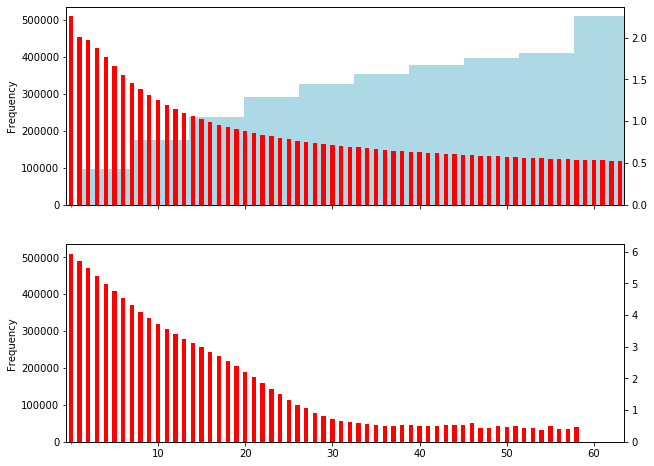

In [213]:

def plot_metric_vs_length_hist(df, ax=ax, one_len=None):
    if one_len:
        df = df[df.length == one_len]
    ax1 = df['length'].plot(kind='hist', color='lightblue', cumulative=True, ax=ax)
    ax2 = ax1.twinx()
    df[token_ids[:one_len]].mean().plot(kind='bar', ax=ax2, color='r')
    xticks = [10,20,30,40,50,60]
    ax2.set_xticks(xticks)
    ax2.set_xticklabels(xticks)
    return ax1, ax2

fig, axs = plt.subplots(2,1, sharex=True, sharey=True, figsize=(10,8))
ax1, ax2 = plot_metric_vs_length_hist(lstm['entropy'], ax=axs[0])
ax1, ax2 = plot_metric_vs_length_hist(unig['entropy'], ax=axs[1])

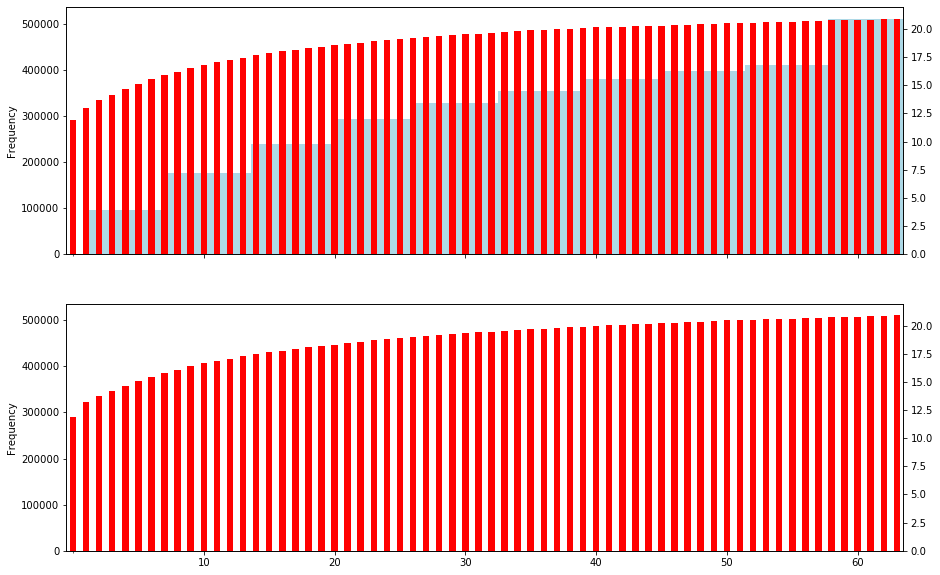

In [232]:
fig, axs = plt.subplots(2,1, sharex=True, sharey=True, figsize=(15,10))
ax1, ax2 = plot_metric_vs_length_hist(lstm['cross_entropy'], ax=axs[0])
ax1, ax2 = plot_metric_vs_length_hist(lstm['cross_entropy'].dropna(), ax=axs[1], one_len=64)

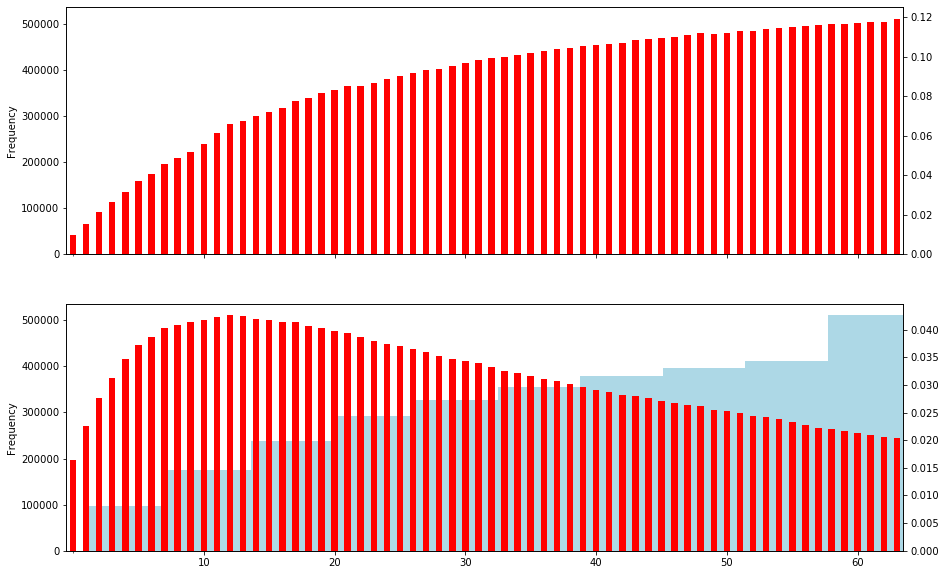

In [231]:
fig, axs = plt.subplots(2,1, sharex=True, sharey=True, figsize=(15,10))
ax1, ax2 = plot_metric_vs_length_hist(lstm['correct_preds'], ax=axs[0], one_len=64)
ax1, ax2 = plot_metric_vs_length_hist(lstm['correct_preds'].dropna(), ax=axs[1])

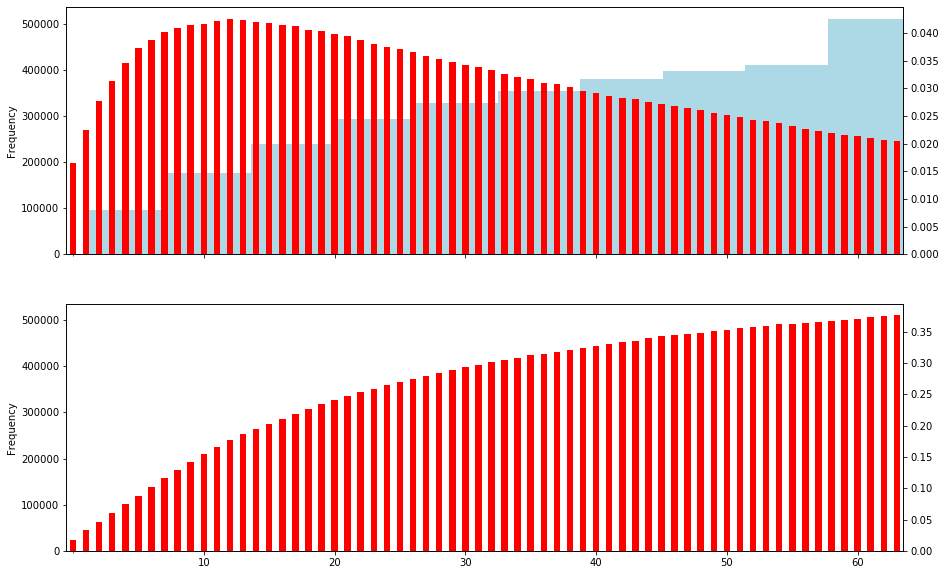

In [197]:
fig, axs = plt.subplots(2,1, sharex=True, sharey=True, figsize=(15,10))
ax1, ax2 = plot_metric_vs_length_hist(lstm['correct_preds'], ax=axs[0])
ax1, ax2 = plot_metric_vs_length_hist(unig['correct_preds'], ax=axs[1])

In [267]:
lstm['correct_preds'][lstm['correct_preds']['final']]

,community,example_id,length,0,1,2,3,4,5,6,...,55,56,57,58,59,60,61,62,63,final
1069,37,942,64,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
1497,34,998,64,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
1499,34,996,64,False,False,False,False,False,False,False,...,False,False,False,True,True,True,True,True,True,True
1501,34,991,64,False,False,False,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1502,34,989,64,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509907,414,127,1,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
509910,414,119,1,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
509912,414,113,1,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
509923,414,50,1,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [240]:
model_dir = "model/reddit/lstm_classifier"
data_dir = "data/reddit_splits"
max_seq_len = 64
file_limit = None
fields = data.load_fields('model/reddit')
fields['text'].include_lengths = True
test_data = data.load_data(data_dir, fields, 'test', max_seq_len, file_limit)


model/reddit/text.field
Using existing fields.
data/reddit_splits/2007scape.test.txt
data/reddit_splits/3DS.test.txt
data/reddit_splits/3Dprinting.test.txt
data/reddit_splits/4chan.test.txt
data/reddit_splits/ACTrade.test.txt
data/reddit_splits/ADHD.test.txt
data/reddit_splits/AMA.test.txt
data/reddit_splits/Advice.test.txt
data/reddit_splits/AdviceAnimals.test.txt
data/reddit_splits/AirForce.test.txt
data/reddit_splits/Anarchism.test.txt
data/reddit_splits/Anarcho_Capitalism.test.txt
data/reddit_splits/Android.test.txt
data/reddit_splits/Animesuggest.test.txt
data/reddit_splits/ApocalypseRising.test.txt
data/reddit_splits/Aquariums.test.txt
data/reddit_splits/Art.test.txt
data/reddit_splits/AsianBeauty.test.txt
data/reddit_splits/AskHistorians.test.txt
data/reddit_splits/AskMen.test.txt
data/reddit_splits/AskReddit.test.txt
data/reddit_splits/AskScienceFiction.test.txt
data/reddit_splits/AskWomen.test.txt
data/reddit_splits/Atlanta.test.txt
data/reddit_splits/Austin.test.txt
data/redd

data/reddit_splits/australia.test.txt
data/reddit_splits/aviation.test.txt
data/reddit_splits/aww.test.txt
data/reddit_splits/baseball.test.txt
data/reddit_splits/battlefield_4.test.txt
data/reddit_splits/battlestations.test.txt
data/reddit_splits/beer.test.txt
data/reddit_splits/bestof.test.txt
data/reddit_splits/beyondthebump.test.txt
data/reddit_splits/bicycling.test.txt
data/reddit_splits/bindingofisaac.test.txt
data/reddit_splits/bjj.test.txt
data/reddit_splits/boardgames.test.txt
data/reddit_splits/bodybuilding.test.txt
data/reddit_splits/bodyweightfitness.test.txt
data/reddit_splits/books.test.txt
data/reddit_splits/boston.test.txt
data/reddit_splits/brasil.test.txt
data/reddit_splits/bravefrontier.test.txt
data/reddit_splits/breakingmom.test.txt
data/reddit_splits/britishproblems.test.txt
data/reddit_splits/buildapc.test.txt
data/reddit_splits/buildapcforme.test.txt
data/reddit_splits/buildapcsales.test.txt
data/reddit_splits/canada.test.txt
data/reddit_splits/cars.test.txt
dat

data/reddit_splits/singapore.test.txt
data/reddit_splits/skyrim.test.txt
data/reddit_splits/skyrimmods.test.txt
data/reddit_splits/smashbros.test.txt
data/reddit_splits/soccer.test.txt
data/reddit_splits/socialism.test.txt
data/reddit_splits/space.test.txt
data/reddit_splits/sports.test.txt
data/reddit_splits/starbucks.test.txt
data/reddit_splits/starcitizen.test.txt
data/reddit_splits/starcraft.test.txt
data/reddit_splits/startrek.test.txt
data/reddit_splits/steroids.test.txt
data/reddit_splits/sto.test.txt
data/reddit_splits/stopdrinking.test.txt
data/reddit_splits/streetwear.test.txt
data/reddit_splits/subaru.test.txt
data/reddit_splits/summonerschool.test.txt
data/reddit_splits/summonerswar.test.txt
data/reddit_splits/supremeclothing.test.txt
data/reddit_splits/survivor.test.txt
data/reddit_splits/sweden.test.txt
data/reddit_splits/swtor.test.txt
data/reddit_splits/sydney.test.txt
data/reddit_splits/syriancivilwar.test.txt
data/reddit_splits/sysadmin.test.txt
data/reddit_splits/tal

In [268]:
comm, ex_id = 37, 942

for ex in test_data:
    if ex.example_id == ex_id and ex.community == comms[comm]:
        break

In [271]:
print(' '.join(ex.text))
print(comms[comm])

i think the 4th actually is a green screen . it just looks all kinds of fake , for one the lighting on her just looks plain wrong , two the photo is drastically different aesthetically from the others , and three her outfit and all the other gear ( like the rug ) from the others is completely gone here , not to
Celebs


In [272]:
m = lstm['cross_entropy'][(lstm['cross_entropy'].example_id == ex_id) & (lstm['cross_entropy'].community==comm)]
m_pred = lstm['pred'][(lstm['cross_entropy'].example_id == ex_id) & (lstm['cross_entropy'].community==comm)]
m_entr = lstm['entropy'][(lstm['cross_entropy'].example_id == ex_id) & (lstm['cross_entropy'].community==comm)]


list(zip(map(lambda x: comms[int(x)], m_pred[token_ids].iloc[0]), m_entr[token_ids].iloc[0], m[token_ids].iloc[0], ex.text))

[('ultrahardcore', 2.88, 6.6635, 'i'),
 ('ApocalypseRising', 0.7574, 10.227, 'think'),
 ('ApocalypseRising', 2.6379, 7.2287, 'the'),
 ('circlejerk', 0.7371, 7.0071, '4th'),
 ('eagles', 0.0296, 13.0405, 'actually'),
 ('eagles', 0.0277, 12.0152, 'is'),
 ('eagles', 0.0155, 11.9167, 'a'),
 ('eagles', 0.0337, 11.5444, 'green'),
 ('eagles', 0.1233, 11.9894, 'screen'),
 ('eagles', 0.019, 14.0073, '.'),
 ('eagles', 0.1603, 11.9646, 'it'),
 ('eagles', 0.4206, 10.1342, 'just'),
 ('eagles', 0.8672, 9.4264, 'looks'),
 ('eagles', 0.9356, 8.4745, 'all'),
 ('EarthPorn', 0.8525, 7.7554, 'kinds'),
 ('eagles', 1.5301, 9.1524, 'of'),
 ('EarthPorn', 1.1404, 3.9311, 'fake'),
 ('eagles', 0.7993, 6.7312, ','),
 ('eagles', 1.2743, 5.2316, 'for'),
 ('eagles', 0.7167, 5.871, 'one'),
 ('EarthPorn', 1.4463, 3.6942, 'the'),
 ('EarthPorn', 1.364, 1.9166, 'lighting'),
 ('EarthPorn', 1.7519, 3.058, 'on'),
 ('Celebs', 0.0004, 0.0, 'her'),
 ('Celebs', 0.0176, 0.0022, 'just'),
 ('Celebs', 0.0065, 0.0007, 'looks'),
 ('Ce

In [171]:
def plot_metric_vs_length_hist(df, ax=None):
    ax1 = df['length'].plot(kind='hist', color='lightblue', cumulative=True, ax=ax)
    ax2 = ax.twinx()
    df[token_ids].mean().plot(kind='bar', ax=ax2, color='r')
    xticks = [10,20,30,40,50,60]
    ax2.set_xticks(xticks)
    ax2.set_xticklabels(xticks)
    return ax1, ax2

def plot_5x4(df, title):
    fig, axs = plt.subplots(5, 4, sharex=True, sharey=True, figsize=(5*4,5*5))
    secondary_axes = []
    fig.suptitle(title)
    for ax_row, lim in zip(axs, (10, 20, 30, 50, 100)):
        for ax1, l in zip(ax_row, layers):
            ax1, ax2 = graph_metric_vs_length_hist(df[l][df[l].length < lim], ax1)
            secondary_axes.append(ax2)
            ax1.set_title(f'{l} <{lim}')
    ax2.get_shared_y_axes().join(*secondary_axes)
    plt.show()

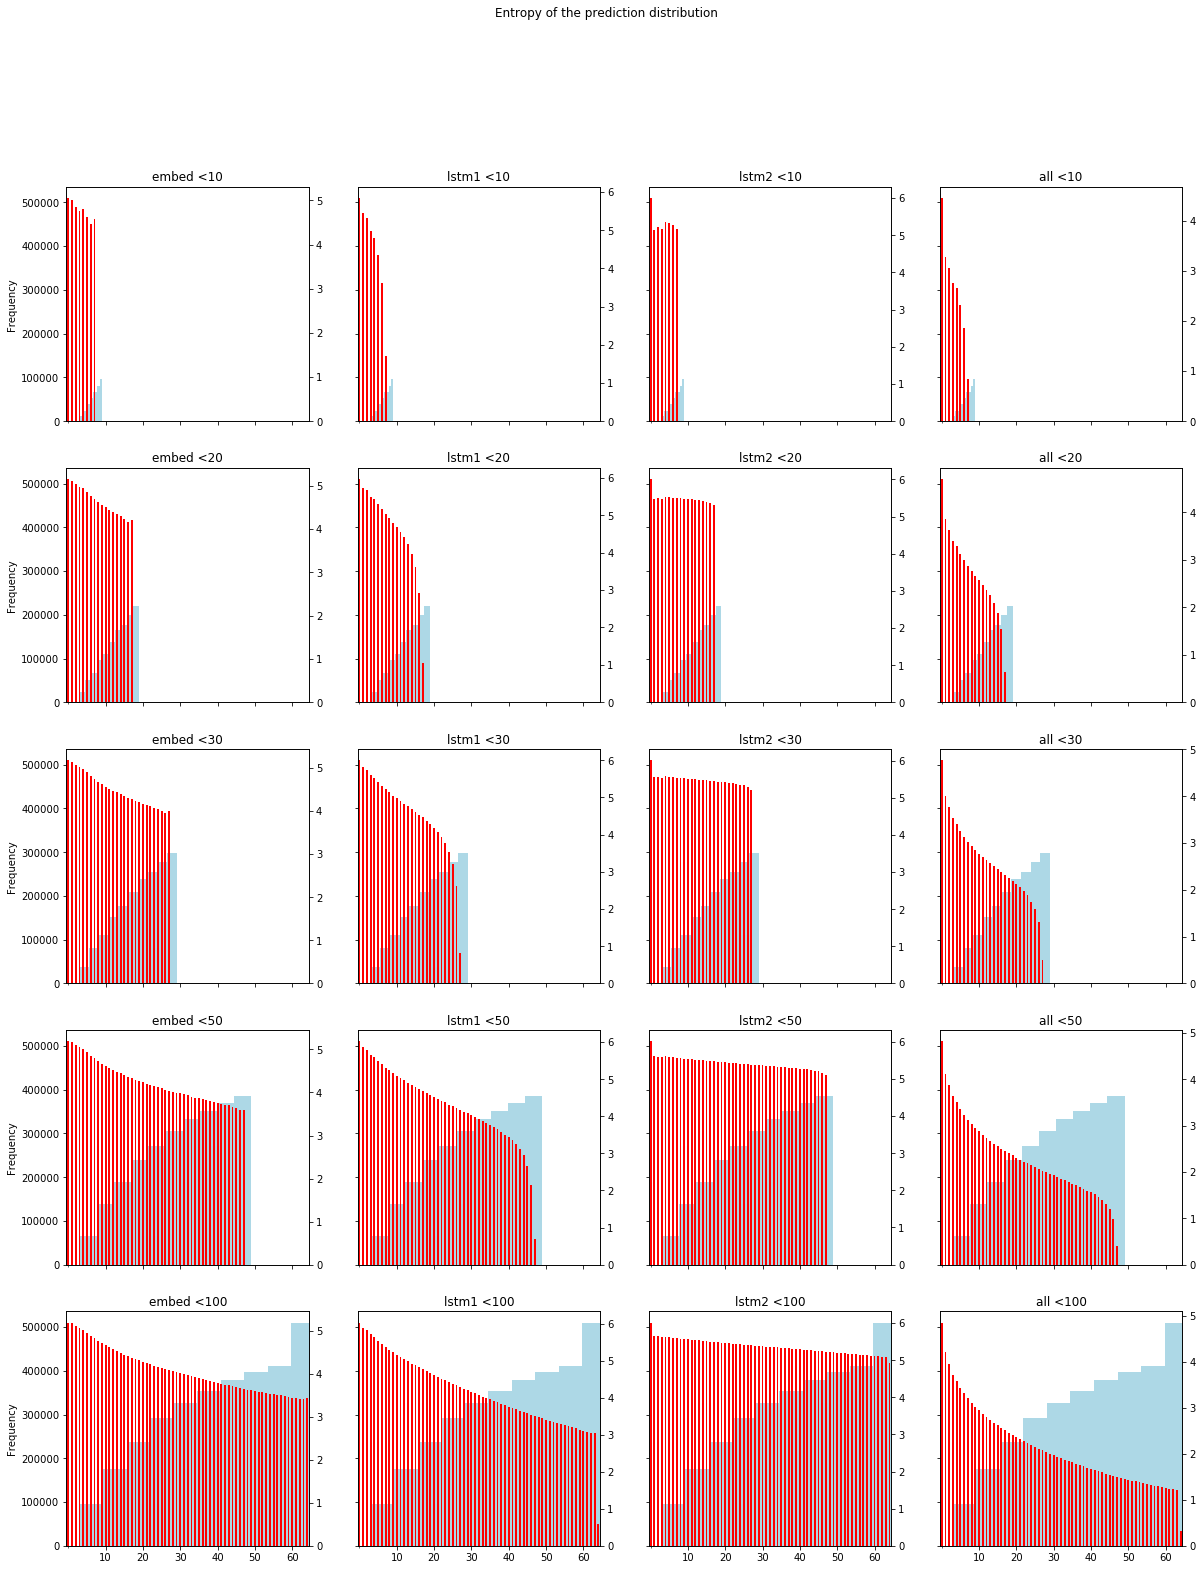

In [10]:
plot_5x4(lstm['entropy'], 'Entropy of the prediction distribution')

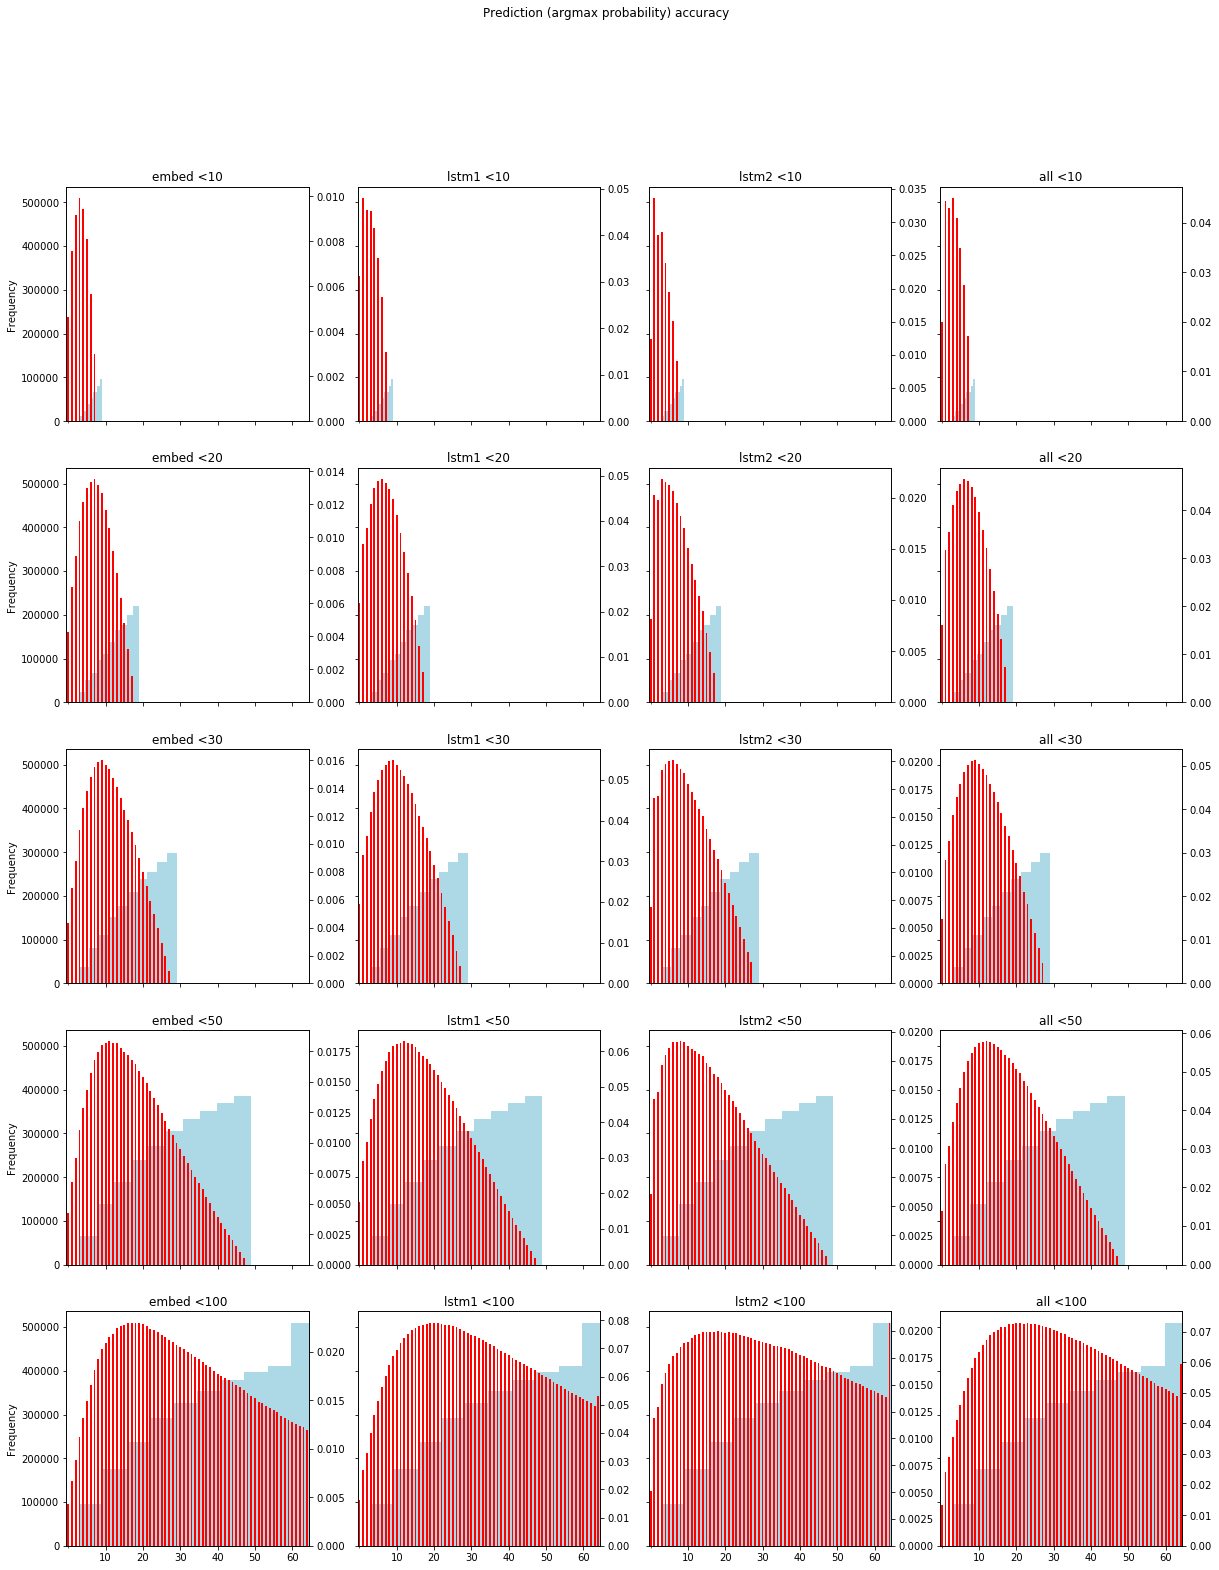

In [11]:
plot_5x4(correct_preds, 'Prediction (argmax probability) accuracy')

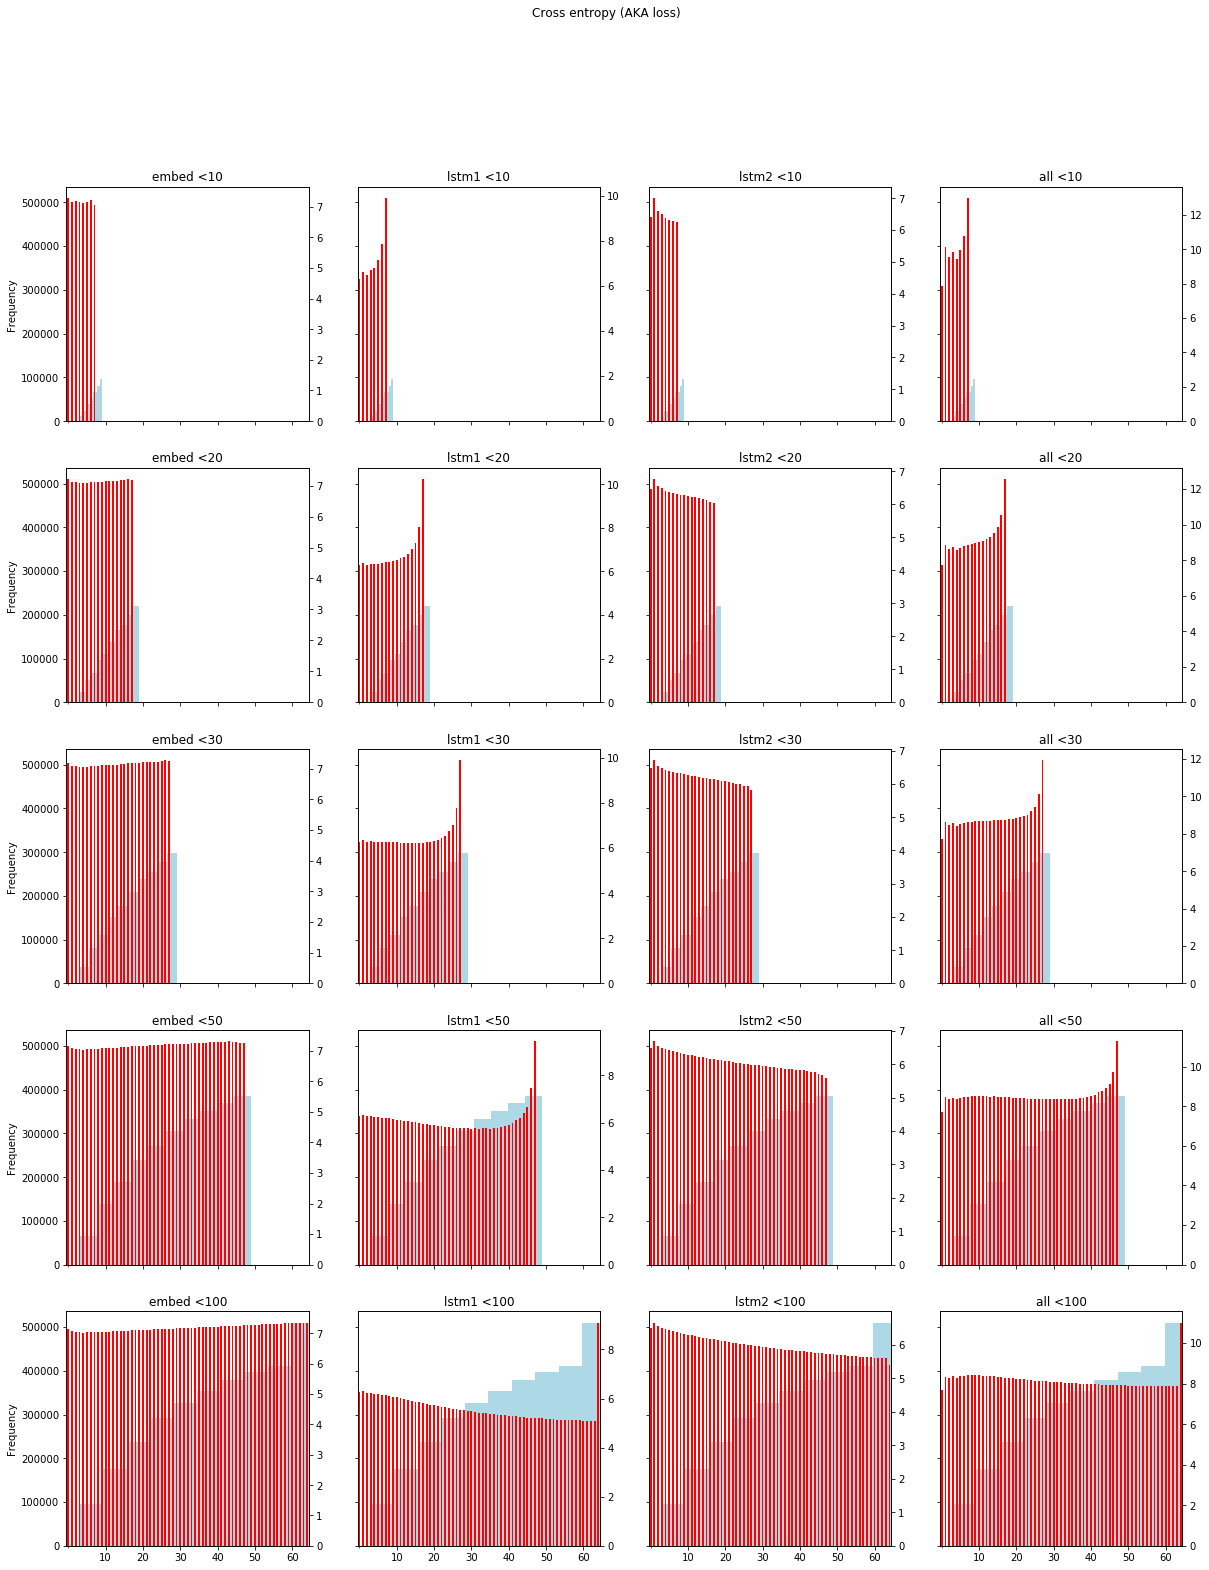

In [13]:
plot_5x4(cross_entropy, 'Cross entropy (AKA loss)')

In [24]:
    model_dir = "model/reddit/lstm_classifier"
    data_dir = "data/reddit_splits"
    max_seq_len = 64
    file_limit = None
    fields = data.load_fields('model/reddit')
    fields['text'].include_lengths = True
    test_data = data.load_data(data_dir, fields, 'test', max_seq_len, file_limit)


model/reddit/text.field
Using existing fields.
data/reddit_splits/2007scape.test.txt
data/reddit_splits/3DS.test.txt
data/reddit_splits/3Dprinting.test.txt
data/reddit_splits/4chan.test.txt
data/reddit_splits/ACTrade.test.txt
data/reddit_splits/ADHD.test.txt
data/reddit_splits/AMA.test.txt
data/reddit_splits/Advice.test.txt
data/reddit_splits/AdviceAnimals.test.txt
data/reddit_splits/AirForce.test.txt
data/reddit_splits/Anarchism.test.txt
data/reddit_splits/Anarcho_Capitalism.test.txt
data/reddit_splits/Android.test.txt
data/reddit_splits/Animesuggest.test.txt
data/reddit_splits/ApocalypseRising.test.txt
data/reddit_splits/Aquariums.test.txt
data/reddit_splits/Art.test.txt
data/reddit_splits/AsianBeauty.test.txt
data/reddit_splits/AskHistorians.test.txt
data/reddit_splits/AskMen.test.txt
data/reddit_splits/AskReddit.test.txt
data/reddit_splits/AskScienceFiction.test.txt
data/reddit_splits/AskWomen.test.txt
data/reddit_splits/Atlanta.test.txt
data/reddit_splits/Austin.test.txt
data/redd

data/reddit_splits/aviation.test.txt
data/reddit_splits/aww.test.txt
data/reddit_splits/baseball.test.txt
data/reddit_splits/battlefield_4.test.txt
data/reddit_splits/battlestations.test.txt
data/reddit_splits/beer.test.txt
data/reddit_splits/bestof.test.txt
data/reddit_splits/beyondthebump.test.txt
data/reddit_splits/bicycling.test.txt
data/reddit_splits/bindingofisaac.test.txt
data/reddit_splits/bjj.test.txt
data/reddit_splits/boardgames.test.txt
data/reddit_splits/bodybuilding.test.txt
data/reddit_splits/bodyweightfitness.test.txt
data/reddit_splits/books.test.txt
data/reddit_splits/boston.test.txt
data/reddit_splits/brasil.test.txt
data/reddit_splits/bravefrontier.test.txt
data/reddit_splits/breakingmom.test.txt
data/reddit_splits/britishproblems.test.txt
data/reddit_splits/buildapc.test.txt
data/reddit_splits/buildapcforme.test.txt
data/reddit_splits/buildapcsales.test.txt
data/reddit_splits/canada.test.txt
data/reddit_splits/cars.test.txt
data/reddit_splits/casualiama.test.txt
da

data/reddit_splits/seduction.test.txt
data/reddit_splits/self.test.txt
data/reddit_splits/serialpodcast.test.txt
data/reddit_splits/sex.test.txt
data/reddit_splits/shittyaskscience.test.txt
data/reddit_splits/shittyfoodporn.test.txt
data/reddit_splits/singapore.test.txt
data/reddit_splits/skyrim.test.txt
data/reddit_splits/skyrimmods.test.txt
data/reddit_splits/smashbros.test.txt
data/reddit_splits/soccer.test.txt
data/reddit_splits/socialism.test.txt
data/reddit_splits/space.test.txt
data/reddit_splits/sports.test.txt
data/reddit_splits/starbucks.test.txt
data/reddit_splits/starcitizen.test.txt
data/reddit_splits/starcraft.test.txt
data/reddit_splits/startrek.test.txt
data/reddit_splits/steroids.test.txt
data/reddit_splits/sto.test.txt
data/reddit_splits/stopdrinking.test.txt
data/reddit_splits/streetwear.test.txt
data/reddit_splits/subaru.test.txt
data/reddit_splits/summonerschool.test.txt
data/reddit_splits/summonerswar.test.txt
data/reddit_splits/supremeclothing.test.txt
data/reddi

In [68]:
' '.join(test_data[m].text)

'when is the last time you did something for the first time ?'

In [69]:
preds = pd.read_csv(lstm_dir/f'pred_all.csv')

In [73]:
' '.join(test_data[m].text)

'when is the last time you did something for the first time ?'

In [76]:
preds.loc[m]

community     471.0
example_id    879.0
length         30.0
1             150.0
2             150.0
              ...  
61              NaN
62              NaN
63              NaN
64              NaN
65              NaN
Name: 209995, Length: 68, dtype: float64

In [88]:
test_data_dict = {i: {} for i, c in enumerate(comms)}
for ex in test_data:
    test_data_dict[comms.index(ex.community)][ex.example_id] = ex

In [90]:
ex = test_data_dict[int(preds.loc[m].community)][int(preds.loc[m].example_id)]

In [91]:
list(zip(ex.text, list(preds[token_ids].loc[m].apply(lambda x: comms[int(x)]))))

ValueError: cannot convert float NaN to integer

[Text(0, 0, 'unless'),
 Text(0, 0, 'other'),
 Text(0, 0, 'guy'),
 Text(0, 0, 'is'),
 Text(0, 0, 'a'),
 Text(0, 0, 'douche'),
 Text(0, 0, 'as'),
 Text(0, 0, 'well'),
 Text(0, 0, ','),
 Text(0, 0, 'in'),
 Text(0, 0, 'which'),
 Text(0, 0, 'case'),
 Text(0, 0, 'they'),
 Text(0, 0, 'are'),
 Text(0, 0, 'perfect'),
 Text(0, 0, 'for'),
 Text(0, 0, 'each'),
 Text(0, 0, 'other'),
 Text(0, 0, '.'),
 Text(0, 0, 'willy'),
 Text(0, 0, 'moon'),
 Text(0, 0, 'and'),
 Text(0, 0, 'that'),
 Text(0, 0, 'cleopatra'),
 Text(0, 0, ','),
 Text(0, 0, 'x'),
 Text(0, 0, 'factor'),
 Text(0, 0, 'judges')]

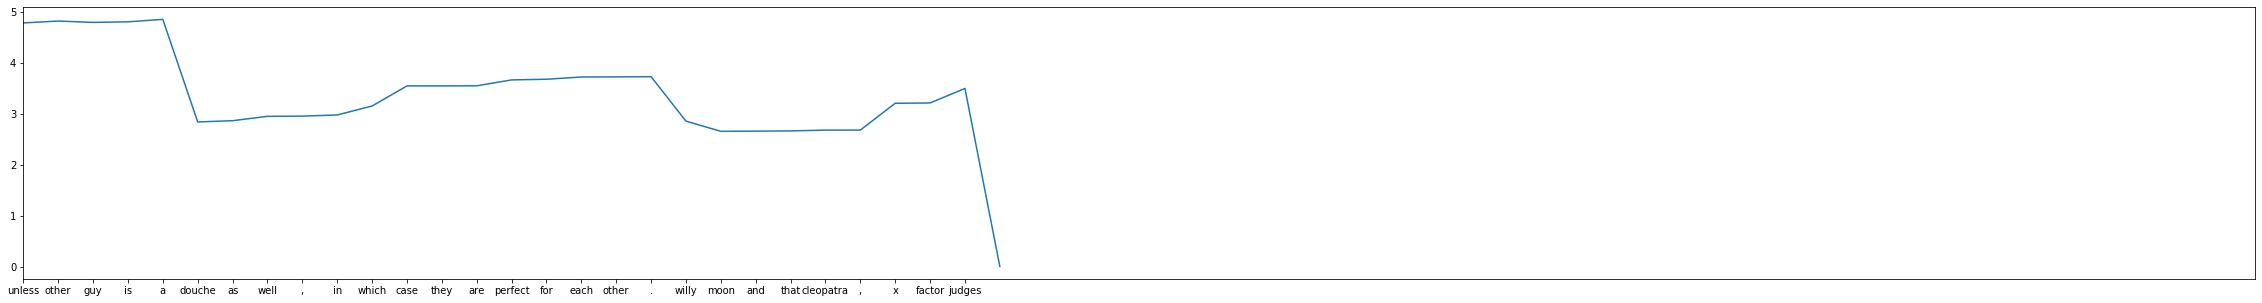

In [96]:
m = 209995
ax.clear()
ax = entropy['all'].loc[m][token_ids].plot(figsize=(40,5))
ax.set_xticks(range(len(ex.text)))
ax.set_xticklabels(ex.text)

In [102]:
list(zip(range(66), entropy['all'].loc[m][token_ids]))

[(0, 4.7907),
 (1, 4.8271),
 (2, 4.8011),
 (3, 4.8117),
 (4, 4.8605),
 (5, 2.8473),
 (6, 2.8717),
 (7, 2.9575),
 (8, 2.9617),
 (9, 2.984),
 (10, 3.1601),
 (11, 3.5543),
 (12, 3.5543),
 (13, 3.5562),
 (14, 3.6723),
 (15, 3.6854),
 (16, 3.7295),
 (17, 3.7316),
 (18, 3.7359),
 (19, 2.8631),
 (20, 2.6633),
 (21, 2.667),
 (22, 2.6718),
 (23, 2.6867),
 (24, 2.6875),
 (25, 3.2138),
 (26, 3.2197),
 (27, 3.5048),
 (28, 0.0119),
 (29, nan),
 (30, nan),
 (31, nan),
 (32, nan),
 (33, nan),
 (34, nan),
 (35, nan),
 (36, nan),
 (37, nan),
 (38, nan),
 (39, nan),
 (40, nan),
 (41, nan),
 (42, nan),
 (43, nan),
 (44, nan),
 (45, nan),
 (46, nan),
 (47, nan),
 (48, nan),
 (49, nan),
 (50, nan),
 (51, nan),
 (52, nan),
 (53, nan),
 (54, nan),
 (55, nan),
 (56, nan),
 (57, nan),
 (58, nan),
 (59, nan),
 (60, nan),
 (61, nan),
 (62, nan),
 (63, nan),
 (64, nan)]

# Unigram model

In [14]:
import numpy as np
from cclm_results import exp_normalize

model/reddit/text.field
Using existing fields.


In [15]:
df = pd.read_csv('model/reddit/unigram-cond/nll.csv')
df[comms] = exp_normalize(df[comms].values, axis=1)

In [16]:
df['genuine_comm_prob'] = df.apply(lambda x: x[x.community], axis=1)

In [17]:
df['cross_entropy'] = -np.log(df.genuine_comm_prob)

/nix/store/q5d4bh361d37y7wkbzqxrimpzxhayc6b-python3-3.7.5-env/lib/python3.7/site-packages/pandas/core/series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [18]:
df['cross_entropy']

0         368.733841
1         112.372714
2         263.908119
3           6.818444
4          16.134426
             ...    
509995    275.273145
509996     10.590251
509997    121.939906
509998     46.608536
509999     19.551601
Name: cross_entropy, Length: 510000, dtype: float64

In [19]:
for l in layers:
    cross_entropy[l]['final'] = cross_entropy[l].apply(lambda x: x[int(x.length-1)], axis=1)
    df[f'{l}_gain'] = df['cross_entropy'] - cross_entropy[l]['final']

In [106]:
df.groupby('community')['cross_entropy'].mean().sort_values().head(20)

community
counting              16.943657
Fireteams             49.268571
GoneWildPlus          56.932622
ladybonersgw          59.774228
gonewild              60.559566
RandomActsOfGaming    60.617012
gonewildcurvy         60.845287
millionairemakers     60.991245
randomactsofcsgo      65.329466
friendsafari          65.343272
RealGirls             65.739235
Celebs                68.048003
4chan                 70.180512
nsfw                  71.190282
weekendgunnit         72.141791
ultrahardcore         74.508577
Jokes                 75.017501
Pokemongiveaway       75.470968
ApocalypseRising      77.660179
MLPLounge             81.245901
Name: cross_entropy, dtype: float64

In [107]:
df.groupby('community')['all_gain'].mean().sort_values().head(20)

community
counting               8.803497
Fireteams             37.953740
GoneWildPlus          49.294383
gonewild              51.108340
ladybonersgw          51.685959
millionairemakers     52.158074
RandomActsOfGaming    52.301582
gonewildcurvy         52.582014
randomactsofcsgo      56.221353
friendsafari          57.038506
Celebs                57.248883
RealGirls             58.093655
4chan                 59.008863
nsfw                  62.859608
ultrahardcore         63.679032
weekendgunnit         64.188749
Pokemongiveaway       67.507686
Jokes                 67.653378
ApocalypseRising      70.569465
tipofmytongue         72.263975
Name: all_gain, dtype: float64

In [21]:
df.groupby('community')['embed_gain'].mean().sort_values()

community
counting                 9.576995
Fireteams               40.874020
GoneWildPlus            48.862555
ladybonersgw            52.686038
gonewild                53.198430
                          ...    
relationship_advice    239.376738
changemyview           241.292420
truegaming             242.939233
circlejerk                    inf
watchpeopledie                inf
Name: embed_gain, Length: 510, dtype: float64

In [22]:
df.groupby('community')['lstm2_gain'].mean().sort_values().head(10)

community
counting              10.759378
Fireteams             43.447008
GoneWildPlus          51.824058
ladybonersgw          53.608272
gonewild              54.109087
millionairemakers     54.355190
gonewildcurvy         54.636664
RandomActsOfGaming    54.701061
randomactsofcsgo      58.949382
friendsafari          59.172523
Name: lstm2_gain, dtype: float64

In [23]:
df

,community,example_id,length,2007scape,3DS,3Dprinting,4chan,ACTrade,ADHD,AMA,...,xboxone,xxfitness,yugioh,zen,genuine_comm_prob,cross_entropy,embed_gain,lstm1_gain,lstm2_gain,all_gain
0,2007scape,0,64,7.259845e-161,1.799660e-147,7.974096e-141,1.311586e-140,1.683398e-132,1.356438e-141,1.924214e-143,...,1.695332e-146,1.936880e-138,5.129926e-147,3.488041e-137,7.259845e-161,368.733841,350.714141,356.704241,361.675041,344.342241
1,2007scape,1,19,1.574528e-49,4.336891e-46,1.782234e-45,4.207222e-48,3.526617e-40,6.643409e-46,8.167941e-47,...,1.318592e-47,4.485498e-45,2.667106e-44,8.524272e-47,1.574528e-49,112.372714,104.907014,104.962214,105.516014,97.420814
2,2007scape,2,48,2.433101e-115,2.181077e-106,4.915648e-104,2.810349e-109,1.422169e-92,4.868065e-104,1.237411e-109,...,1.956184e-111,3.913928e-99,5.999383e-104,2.088993e-107,2.433101e-115,263.908119,248.402419,254.691019,256.883319,239.783919
3,2007scape,3,2,1.093421e-03,1.421919e-03,1.795499e-03,1.254682e-03,2.605684e-03,1.730993e-03,1.560254e-03,...,1.289094e-03,2.037568e-03,1.816883e-03,7.755886e-04,1.093421e-03,6.818444,-4.469856,-7.540156,-0.017056,-22.363456
4,2007scape,4,5,9.838018e-08,2.717447e-07,1.995982e-07,3.765453e-08,5.338644e-07,1.151897e-07,4.531678e-08,...,3.385074e-07,1.372982e-07,2.264176e-07,2.500326e-08,9.838018e-08,16.134426,5.721226,6.403426,8.384326,-4.751774
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509995,zen,995,63,3.474742e-115,2.513917e-115,7.052382e-121,1.241199e-121,2.040042e-99,1.808413e-114,4.596675e-118,...,2.269839e-115,1.213178e-115,1.782673e-116,2.820928e-120,2.820928e-120,275.273145,272.273145,272.273145,272.273145,272.273145
509996,zen,996,3,3.661497e-03,7.830721e-04,5.903497e-04,1.037320e-04,6.404973e-05,1.213088e-03,4.290833e-04,...,7.829995e-04,9.182063e-05,3.901326e-03,2.516011e-05,2.516011e-05,10.590251,7.590251,7.590251,7.590251,7.590251
509997,zen,997,25,8.240964e-50,8.617007e-49,3.223758e-48,4.045625e-52,3.496684e-45,8.290325e-50,8.936088e-52,...,5.958694e-50,6.810982e-47,2.225405e-46,1.101975e-53,1.101975e-53,121.939906,118.939906,118.939906,118.939906,118.939906
509998,zen,998,12,1.144956e-18,1.283216e-17,1.789463e-18,8.315089e-21,5.987559e-15,8.957478e-19,5.952834e-21,...,5.677833e-18,1.998033e-17,2.972830e-15,5.730202e-21,5.730202e-21,46.608536,43.608536,43.608536,43.608536,43.608536
